# Forests of randomized trees
Some References:
- https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from helper_functions import clean_data, model_statistics, plot_pred, extract_r_p

### Data Preprocessing
- Removing outliers of price
- Apply categorial label

In [2]:
london = pd.read_csv('london_weekdays.csv')
london = clean_data(london)
london.head()


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.098074,2,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,297.984430,1,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,336.790611,1,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,226.722171,1,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,256.355982,1,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


### Split Data

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [4]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
x,y = extract_r_p(london)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
x_train.head()

,person_capacity,bedrooms,dist,attr_index_norm,rest_index_norm,room_type,biz
1922,4.0,1,0.675248,56.073066,53.816733,2,1
2011,5.0,2,5.213153,14.426461,8.522959,2,1
2213,2.0,1,7.113311,12.499393,6.240945,1,0
2542,2.0,1,1.632594,37.382270,20.049188,2,0
2590,4.0,1,8.774428,13.050076,6.074806,2,0


### Train and Test

In [6]:
# create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
model.fit(x_train, y_train.values.ravel())

#Prediction using test data set 
y_test_pred = model.predict(x_test)

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7046028813976645
Mean Squared Error (MSE) 	: 8541.24772244483



C:\Users\pwspang\Desktop\SC1015-AirBNB\helper_functions.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w-" (-> color='w'). The keyword argument will take precedence.
  axes.plot(y_test, y_test, 'w-', linewidth = 3, color="red")


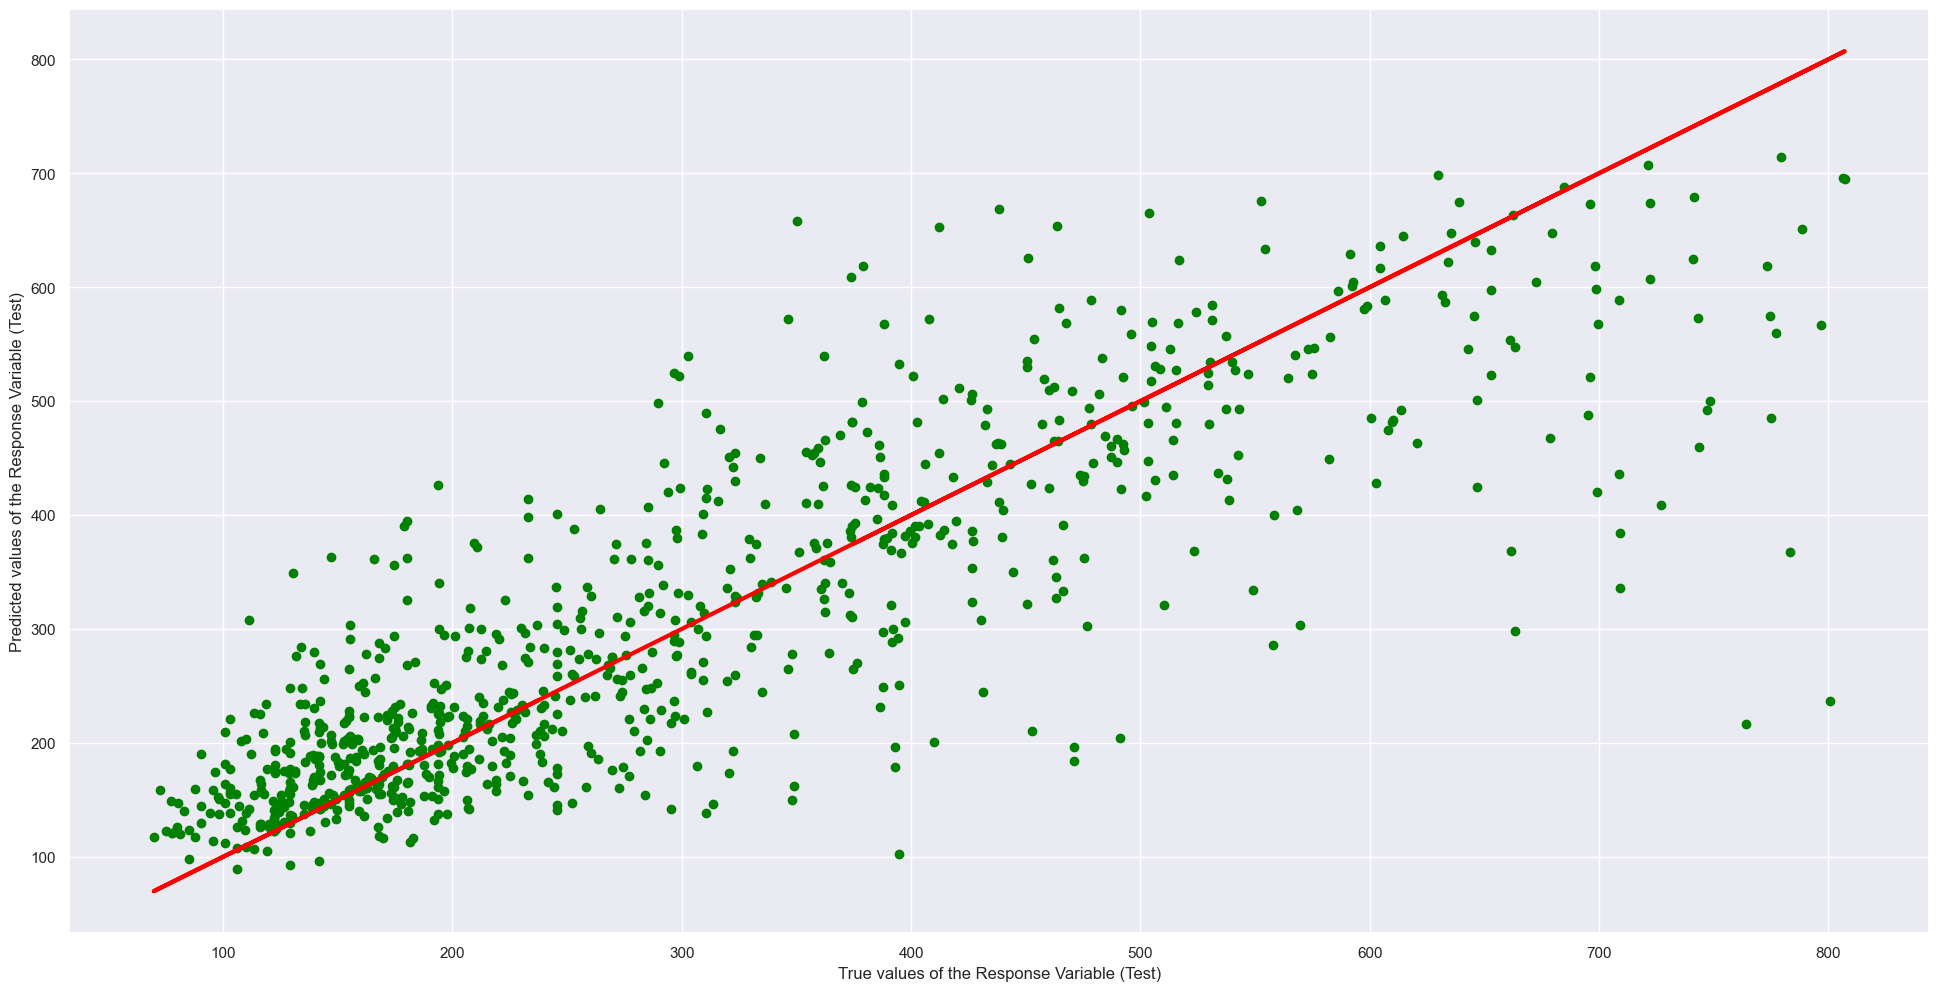

In [7]:
model_statistics(model, x_test, y_test, y_test_pred)

plot_pred(y_test, y_test_pred)

# Splitting data into groups 

0-300
300-600
600+


In [ ]:
df = pd.DataFrame(london, index=x_test.index)
y_pred_df = pd.DataFrame(y_test_pred, index=x_test.index)
y_pred_df.columns = ['predSum']
df = pd.concat([df, y_pred_df], axis=1)
df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,predSum
3860,483.078153,1,False,True,4.0,False,1,0,10.0,100.0,1,1.514716,0.085980,647.424668,45.003207,957.967290,17.153204,-0.11258,51.49840,350.022343
3663,128.883558,1,False,True,2.0,False,0,0,10.0,100.0,1,6.246459,2.213169,185.822670,12.916740,425.500454,7.618941,-0.07485,51.55385,218.857452
2649,126.296479,1,False,True,2.0,False,0,0,9.0,90.0,1,8.394506,4.374441,138.453245,9.624039,278.458379,4.986030,-0.05714,51.44700,173.734095
2908,360.779887,2,False,False,4.0,False,0,0,10.0,98.0,1,5.987395,0.986962,189.313953,13.159423,410.161720,7.344288,-0.11991,51.56193,296.039418
953,231.661140,1,False,True,2.0,False,0,1,9.0,90.0,1,1.174490,0.402096,1099.396179,76.420248,1507.860121,26.999494,-0.12544,51.51880,285.281874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,142.524518,1,False,True,2.0,False,1,0,10.0,100.0,1,5.310103,0.858481,220.951021,15.358551,466.506095,8.353181,-0.15189,51.55356,184.317599
1566,339.848068,1,False,True,2.0,False,1,0,10.0,100.0,1,3.878852,0.770294,281.205604,19.546914,720.632929,12.903534,-0.10160,51.53921,306.681719
3786,356.076107,1,False,True,2.0,True,0,0,10.0,95.0,1,4.302409,0.392975,352.312781,24.489652,718.098725,12.858157,-0.06654,51.51523,335.407700
1347,183.447400,1,False,True,2.0,False,0,1,7.0,76.0,1,9.523274,0.287539,117.417672,8.161833,299.081167,5.355298,-0.16500,51.42600,194.494226


In [ ]:
underpriced = df.query('realSum < predSum')
overpriced = df.query('realSum > predSum')

In [ ]:
underpriced_lt_300 = df.query('realSum < predSum and realSum < 300')
overpriced_lt_300 = df.query('realSum > predSum and realSum < 300')
underpriced_mt_300 = df.query('realSum < predSum and realSum > 300')
overpriced_mt_300 = df.query('realSum > predSum and realSum > 300')

print(underpriced_lt_300.shape)
print(overpriced_lt_300.shape)
print(underpriced_mt_300.shape)
print(overpriced_mt_300.shape)

print(underpriced_lt_300.shape[0]/(overpriced_lt_300.shape[1]+underpriced_lt_300.shape[0]))
print(underpriced_mt_300.shape[0]/(overpriced_mt_300.shape[1]+underpriced_mt_300.shape[0]))



(378, 20)
(154, 20)
(128, 20)
(214, 20)
0.949748743718593
0.8648648648648649
